In [1]:
import json
import numpy as np
node_dict = {}
with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            print("Stanford", feature["properties"]["MOVEMENT_ID"])
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            print("UCSC", feature["properties"]["MOVEMENT_ID"])
        data = feature["geometry"]["coordinates"][0][0]
        c1= []
        c2 = []
        for d in data:
            c1.append(d[0])
            c2.append(d[1])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [np.mean(c1), np.mean(c2)]

('UCSC', u'1968')
('Stanford', u'2607')


In [2]:
print(node_dict[1968])
print(node_dict[2607])

[-122.0645618108108, 36.974168810810809]
[-122.17598222222222, 37.429685888888891]


In [3]:
from scipy.spatial import Delaunay
import numpy as np
# print(node_dict.values())

In [4]:
# stanford_nodes = stanford_nodes[0][0]
# ucsc_nodes = ucsc_nodes[0][0]

# nodes = []
# for node in stanford_nodes:
#     nodes.append(node)
# for node in ucsc_nodes:
#     nodes.append(node)
points = np.array(list(node_dict.values()))

In [5]:
print(len(points))

2710


In [6]:
print(points[1967])
print(points[2606])

[-122.06456181   36.97416881]
[-122.17598222   37.42968589]


In [7]:
tri = Delaunay(points)

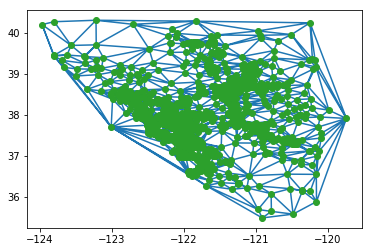

In [8]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [9]:
print(tri.vertices[1])

[204 247 629]


In [10]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = ([tri.vertices[n,0], tri.vertices[n,1]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,0], tri.vertices[n,2]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,1], tri.vertices[n,2]])     
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
# print(edges)

In [11]:
import csv
speed_dict = {}
with open('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    next(csvReader, None)
    for row in csvReader:
        if row[2] == "12":
            sorted_list = sorted([int(row[0]) - 1, int(row[1]) - 1])
            keypair = (sorted_list[0], sorted_list[1])
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            else:
                speed_dict[keypair] = [float(row[3])]
#             keypair = (int(row[1]) - 1, int(row[0]) - 1)
#             if keypair in speed_dict:
#                 speed_dict[keypair].append(float(row[3]))
#             else:
#                 speed_dict[keypair] = [float(row[3])]


In [12]:
for key, value in zip(speed_dict.keys(), speed_dict.values()):
    speed_dict[key] = np.mean(value)

In [13]:
traffic_flows = {}
filtered_edges = []
filtered_points = []
for i in range(len(edges)):
    edge = list(edges)[i]
#     start = points[edge[0]]
#     end = points[edge[1]]
    start = node_dict[edge[0]]
    end = node_dict[edge[1]]
    key1 = (edge[0],edge[1])
    if key1 in speed_dict:
        filtered_edges.append(edge)
        filtered_points.append(node_dict[edge[0]])
        filtered_points.append(node_dict[edge[1]])
        road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
        speed = road_len/speed_dict[key1]
#         road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    #     traffic_flow = 4*(road_len / (0.003 + (60 * 2)/3600.0))
        traffic_flow = speed * (1/(0.003 + (speed * 2)/3600.0))
        traffic_flows[edge] = traffic_flow
        print("For road: ", edge, " the traffic flow is: ", traffic_flow)



('For road: ', (95, 1515), ' the traffic flow is: ', 1717.6179299193416)
('For road: ', (231, 2512), ' the traffic flow is: ', 1762.8003593689232)
('For road: ', (1268, 2361), ' the traffic flow is: ', 1681.4693967464341)
('For road: ', (1932, 1934), ' the traffic flow is: ', 1703.9402192268824)
('For road: ', (1996, 2157), ' the traffic flow is: ', 1603.5911145685081)
('For road: ', (2011, 2387), ' the traffic flow is: ', 1646.6896470158074)
('For road: ', (1043, 1637), ' the traffic flow is: ', 1617.7485742063946)
('For road: ', (1926, 2520), ' the traffic flow is: ', 1715.9269766988716)
('For road: ', (2264, 2269), ' the traffic flow is: ', 1604.3302777341682)
('For road: ', (1064, 1538), ' the traffic flow is: ', 1712.494206040747)
('For road: ', (984, 1587), ' the traffic flow is: ', 1595.2082571690773)
('For road: ', (1755, 2247), ' the traffic flow is: ', 1660.9506146167407)
('For road: ', (610, 2596), ' the traffic flow is: ', 1638.7015336563543)
('For road: ', (567, 746), ' th

('For road: ', (694, 1919), ' the traffic flow is: ', 1728.5158768042957)
('For road: ', (689, 1896), ' the traffic flow is: ', 1754.5670358187981)
('For road: ', (922, 2547), ' the traffic flow is: ', 1766.3838732410391)
('For road: ', (952, 2687), ' the traffic flow is: ', 1715.4953335469861)
('For road: ', (474, 2484), ' the traffic flow is: ', 1653.9830607921467)
('For road: ', (1113, 2116), ' the traffic flow is: ', 1451.2696140966348)
('For road: ', (678, 1728), ' the traffic flow is: ', 1687.8820945497368)
('For road: ', (458, 590), ' the traffic flow is: ', 1642.8674806687754)
('For road: ', (948, 2420), ' the traffic flow is: ', 1686.7873002569688)
('For road: ', (60, 1566), ' the traffic flow is: ', 1708.9004205268154)
('For road: ', (822, 1914), ' the traffic flow is: ', 1715.0696209392947)
('For road: ', (1567, 2156), ' the traffic flow is: ', 1588.773771961427)
('For road: ', (1942, 2675), ' the traffic flow is: ', 1519.1491880936539)
('For road: ', (86, 740), ' the traffi

('For road: ', (1468, 1470), ' the traffic flow is: ', 1683.8181255946183)
('For road: ', (972, 1712), ' the traffic flow is: ', 1594.4582016954118)
('For road: ', (300, 757), ' the traffic flow is: ', 1683.3667707449904)
('For road: ', (1119, 2280), ' the traffic flow is: ', 1591.2184895756507)
('For road: ', (2245, 2246), ' the traffic flow is: ', 1724.97945281077)
('For road: ', (59, 1555), ' the traffic flow is: ', 1708.5428209416214)
('For road: ', (261, 1262), ' the traffic flow is: ', 1682.6734867787079)
('For road: ', (1703, 2672), ' the traffic flow is: ', 1719.5598590392681)
('For road: ', (1601, 1602), ' the traffic flow is: ', 1669.9797420385321)
('For road: ', (1741, 2707), ' the traffic flow is: ', 1684.6703578828235)
('For road: ', (187, 504), ' the traffic flow is: ', 1737.2006555276528)
('For road: ', (836, 923), ' the traffic flow is: ', 1722.6000266890646)
('For road: ', (1016, 1636), ' the traffic flow is: ', 1650.3960761212518)
('For road: ', (1387, 2487), ' the tr

('For road: ', (675, 1738), ' the traffic flow is: ', 1745.1808315974085)
('For road: ', (908, 2322), ' the traffic flow is: ', 1659.1862700021056)
('For road: ', (528, 1453), ' the traffic flow is: ', 1634.6411314187144)
('For road: ', (681, 1746), ' the traffic flow is: ', 1729.505564067766)
('For road: ', (1171, 2111), ' the traffic flow is: ', 1656.9423541451067)
('For road: ', (233, 527), ' the traffic flow is: ', 1613.5514430103231)
('For road: ', (980, 1577), ' the traffic flow is: ', 1597.6382411773902)
('For road: ', (407, 1729), ' the traffic flow is: ', 1542.5642821554879)
('For road: ', (1024, 2482), ' the traffic flow is: ', 1653.9138516344606)
('For road: ', (1310, 1328), ' the traffic flow is: ', 1749.2117143694372)
('For road: ', (1703, 2315), ' the traffic flow is: ', 1751.3263748289439)
('For road: ', (1518, 2615), ' the traffic flow is: ', 1711.4026319401707)
('For road: ', (2101, 2103), ' the traffic flow is: ', 1549.3017441926745)
('For road: ', (487, 2482), ' the 

('For road: ', (1911, 2369), ' the traffic flow is: ', 1692.4374611191129)
('For road: ', (1020, 2202), ' the traffic flow is: ', 1724.8339019049652)
('For road: ', (833, 2681), ' the traffic flow is: ', 1542.1078939960328)
('For road: ', (351, 1924), ' the traffic flow is: ', 1704.7579087441202)
('For road: ', (59, 1554), ' the traffic flow is: ', 1730.4082479893384)
('For road: ', (651, 2496), ' the traffic flow is: ', 1752.992344462677)
('For road: ', (1931, 2171), ' the traffic flow is: ', 1703.8913346669126)
('For road: ', (379, 2144), ' the traffic flow is: ', 1709.2081010291104)
('For road: ', (101, 2538), ' the traffic flow is: ', 1677.1435816460069)
('For road: ', (2150, 2401), ' the traffic flow is: ', 1583.2223674930769)
('For road: ', (63, 2532), ' the traffic flow is: ', 1615.0383682028403)
('For road: ', (546, 2520), ' the traffic flow is: ', 1711.1102127962017)
('For road: ', (216, 2354), ' the traffic flow is: ', 1643.516213240971)
('For road: ', (724, 2655), ' the traf

In [184]:
import networkx as nx 
graph1 = nx.Graph(list(edges)) 
graph2 = nx.Graph(list(filtered_edges)) 
# print(graph.edges()) 

# largest_g1 = max(nx.connected_component_subgraphs(graph1), key=len)
# graphs_1 = list(nx.connected_component_subgraphs(graph1))
# print(len(graphs_1))
# graphs_2 = list(nx.connected_component_subgraphs(graph2))
# print(len(graphs_2))
largest_g2 = max(nx.connected_component_subgraphs(graph2), key=len)

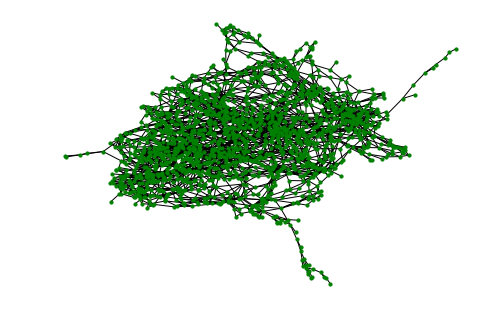

In [132]:
import matplotlib.pyplot as plt 
# pointIDXY = dict(zip(range(len(points)), points)) 
# pointIDXY = dict(zip(range(len(largest_g1.nodes)), largest_g1.nodes))
# nx.draw(graph1,node_size = 10, node_color = "blue") 
# plt.show() 

# pointIDXY = dict(zip(range(len(filtered_points)), filtered_points)) 
nx.draw(largest_g2,node_size = 10, node_color = "green") 
plt.show()

In [185]:
nx.set_edge_attributes(largest_g2, traffic_flows, 'capacity')

In [174]:
print(len(edges))

10810


In [186]:
display, location = {}, {}
with open('vertex_list_G.txt') as nodeAttrFile:
    csvReader = csv.reader(nodeAttrFile, delimiter='|')
    next(csvReader, None)
    for row in csvReader:
        nodeId = int(row[0]) - 1
        display[nodeId] = row[1]
        location[nodeId] = (float(row[2]), float(row[3]))

nx.set_node_attributes(largest_g2, display, 'display')
nx.set_node_attributes(largest_g2, location, 'location')

In [187]:
weight = {}
with open('edge_list_G.csv') as edgeAttrFile:
    csvReader = csv.reader(edgeAttrFile)
    next(csvReader, None)
    for row in csvReader:
        weight[(int(row[0])-1, int(row[1])-1)] = float(row[2])

nx.set_edge_attributes(largest_g2, weight, 'weight')

#### Q13 Calculate the Max Flow & Calculate the Number of Edge-Disjoint Paths


In [177]:
stanford_id = 2606
UCSC_id = 1967
print("max flow", nx.maximum_flow_value(largest_g2, stanford_id, UCSC_id))

from networkx.algorithms.connectivity.disjoint_paths import edge_disjoint_paths
print("edge disjoint paths", len(list(edge_disjoint_paths(largest_g2, stanford_id, UCSC_id))))

('max flow', 3184.2358925766903)
('edge disjoint paths', 2)


#### Q14 Defoliate the Graph

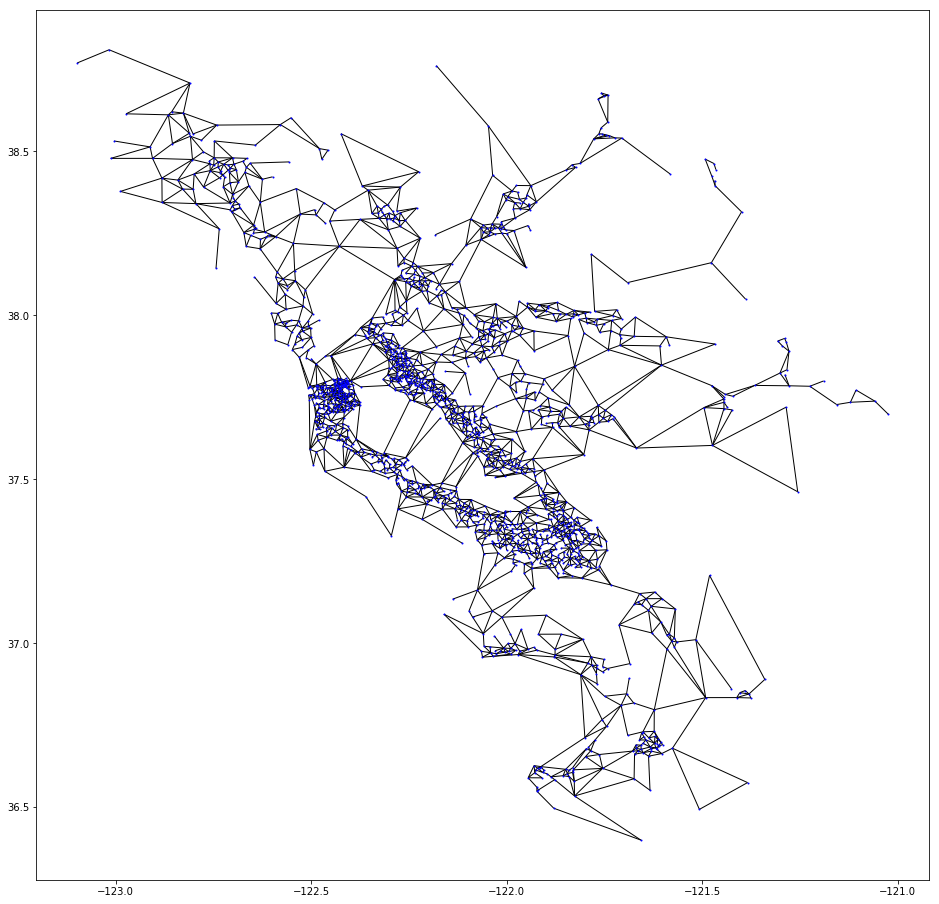

In [179]:
plt.figure(figsize=(16,16))
nx.draw_networkx(largest_g2, nx.get_node_attributes(largest_g2, 'location'), with_labels=False, node_size=1,node_color='blue')
plt.show()

In [196]:
threshold = 870
ebunch = []
for (u,v) in largest_g2.edges():
    if largest_g2[u][v]['weight'] > threshold:
        ebunch.append((u,v))
        
largest_g2.remove_edges_from(ebunch)

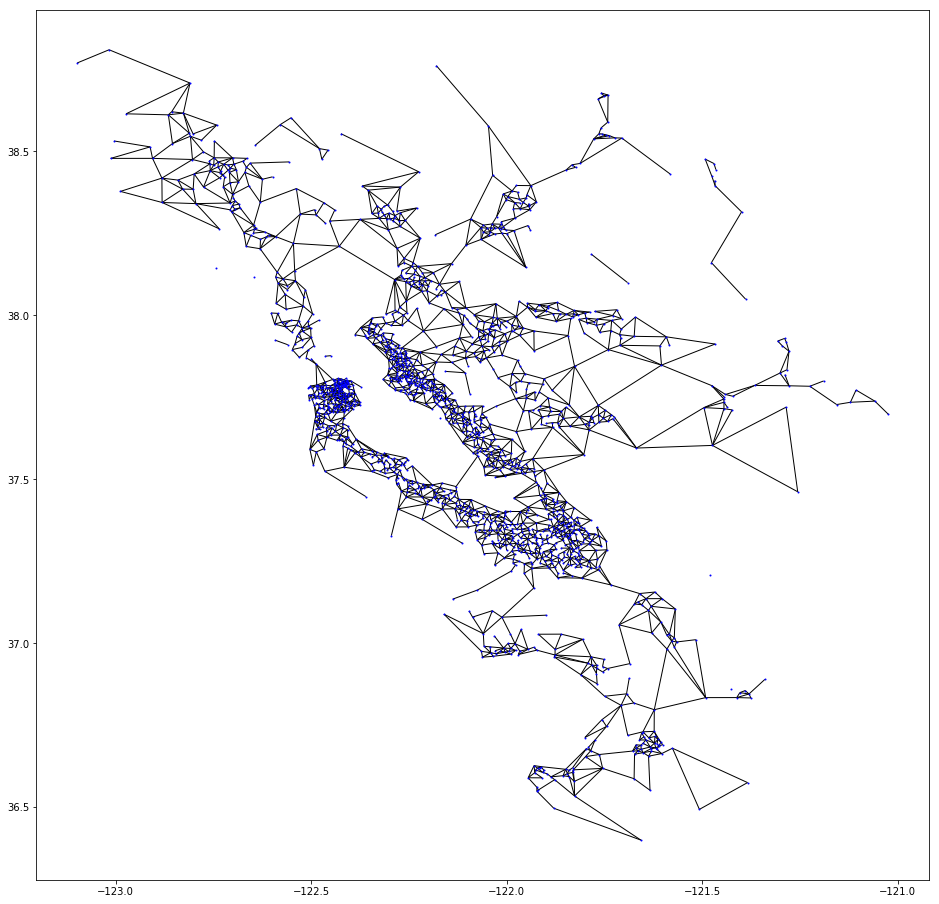

In [197]:
plt.figure(figsize=(16,16))
nx.draw_networkx(largest_g2, nx.get_node_attributes(largest_g2, 'location'), with_labels=False, node_size=1,node_color='blue')
plt.show()

#### Q15: repeat Q13 on defoliated graph

In [198]:
print("max flow", nx.maximum_flow_value(largest_g2, stanford_id, UCSC_id))
print("edge disjoint paths", len(list(edge_disjoint_paths(largest_g2, stanford_id, UCSC_id))))

('max flow', 3047.1299570592373)
('edge disjoint paths', 2)
